In [2]:
# analyzing physical dataset of magnetic solid based on the ISING model

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
import random

# set font sizes for plots
SMALL_SIZE = 9
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
numpy_array=np.load("data/ising.npz")

with np.load("data/ising.npz") as datafile:
    spins=datafile["spins"]
    temp=datafile["temp"]

In [ ]:
# knowing the data (2d slices of solid represented by arrays with 1 and -1) we
# can look at two magnetization and staggered magnetization for each slice:
# effectively reducing the dimensionality of the data

# build signmatrix for staggered magnetization
# low staggered magnetization means strong grouping of magnetic regimes (weisssche bezirke)


In [5]:
signmatrix=np.zeros((np.shape(spins)[1], np.shape(spins)[2]))
for i in range(np.shape(spins)[1]):
    for j in range(np.shape(spins)[2]):
        signmatrix[i,j]=(-1)**(i+j)

(L1,L2)=np.shape(spins[0,:,:])

magn=[]
smagn=[]
for i in range(np.shape(spins)[0]):
    magn.append(np.sum(spins[i,:,:])/(L1*L2))
    tempo=0
    for j in range(L1):
        for k in range(L2):
            tempo+=signmatrix[j,k]*spins[i,j,k]
    smagn.append(tempo/(L1*L2))

magn=np.array(magn)
smagn=np.array(smagn)

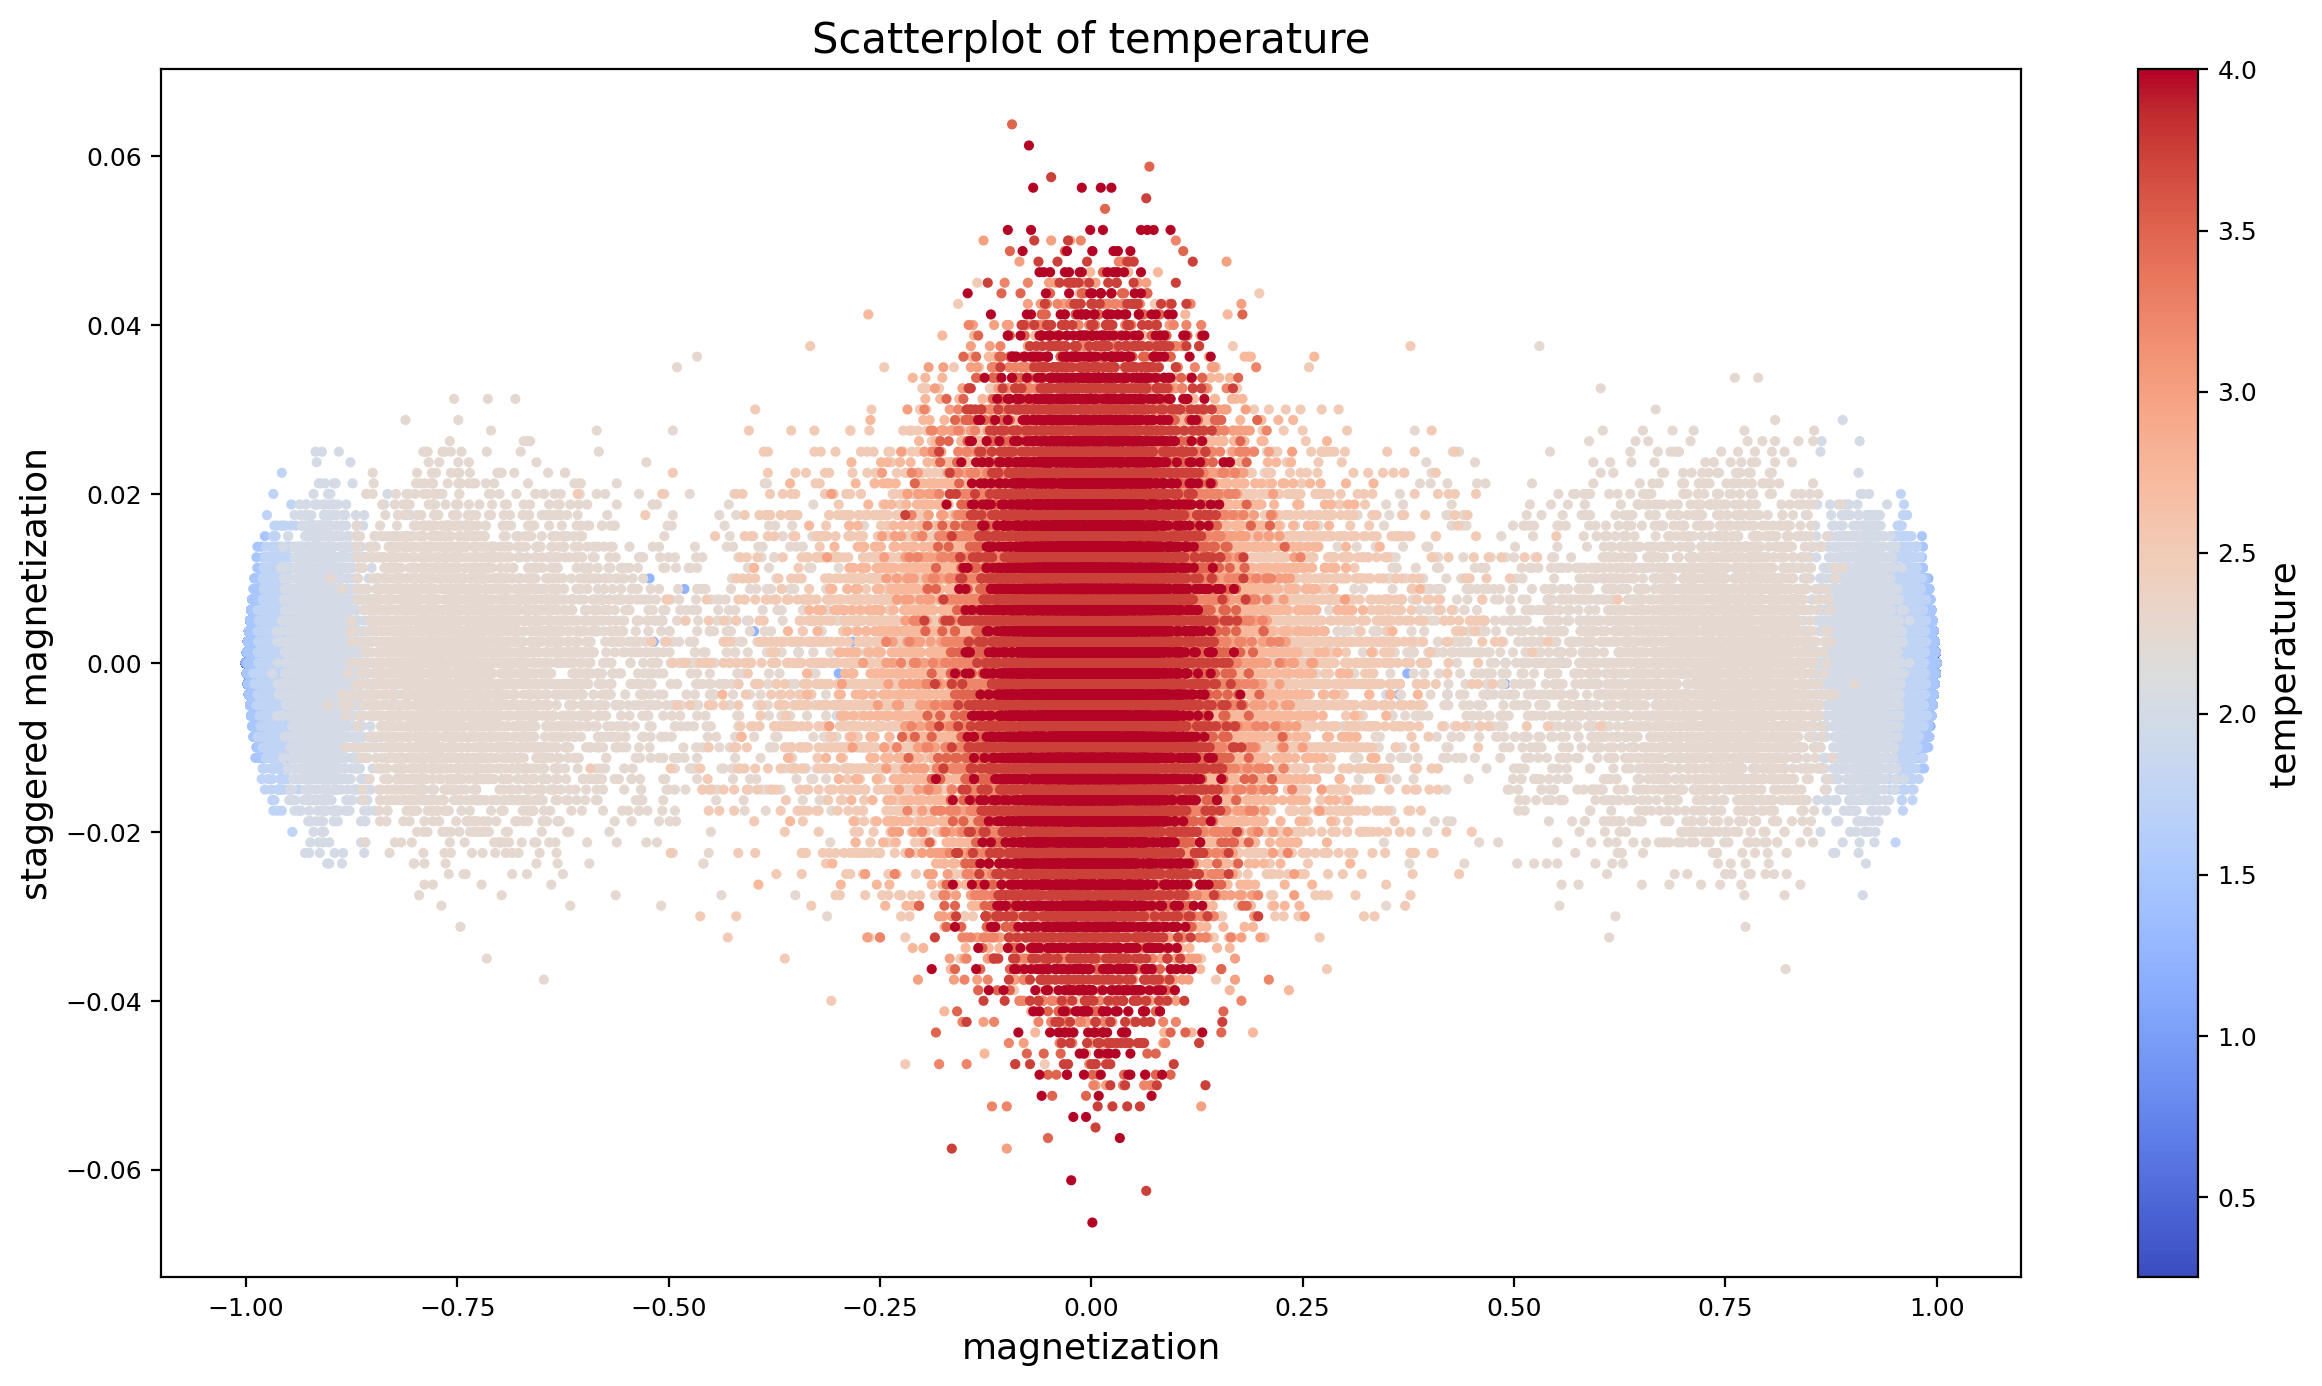

In [55]:
# visualizing the behaviour over temperature

plt.figure(figsize=(15,8), dpi=200)
plt.scatter(magn, smagn, c=temp, s=7, cmap='coolwarm')
plt.colorbar(label='temperature')
plt.title("Scatterplot of temperature")
plt.xlabel("magnetization")
plt.ylabel("staggered magnetization")
plt.savefig("data/plots/scatterplot_over_temperature.png")

In [10]:
# This already suggest a lot of the physical behaviour

In [7]:
# The plot suggests the use of 3 clusters

X_data=np.column_stack((magn, smagn))
cluster_model=sklearn.cluster.KMeans(n_clusters=3)
cluster_model.fit(X_data)

labels=cluster_model.labels_

c:\users\marcu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


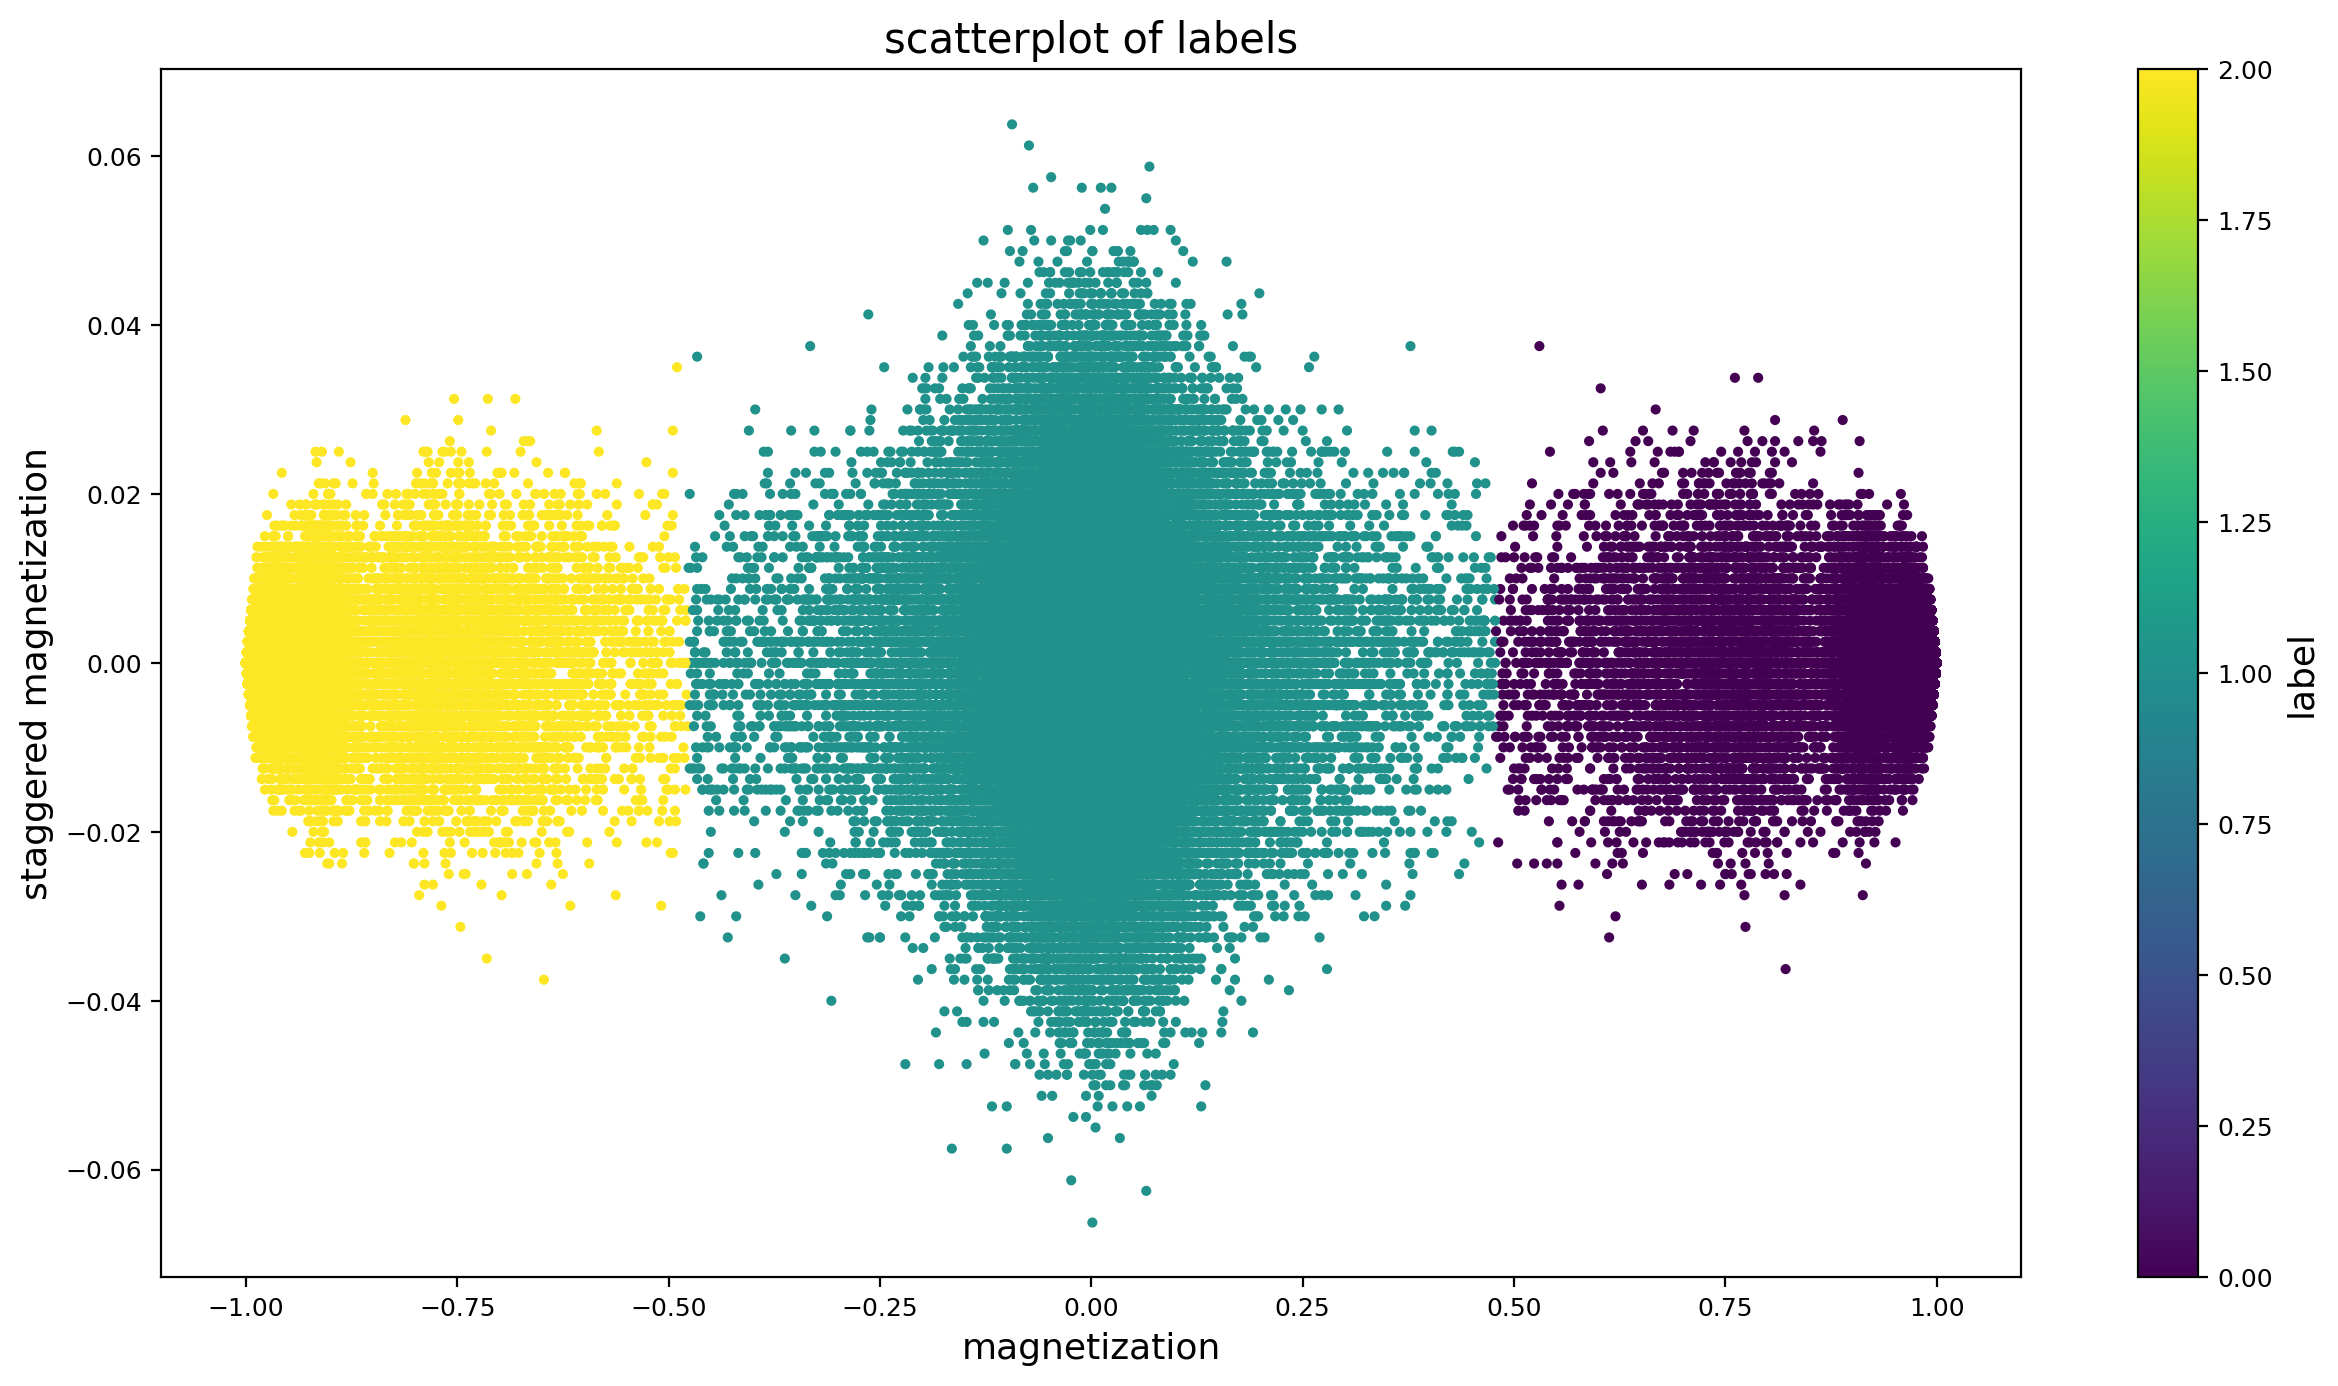

In [56]:
plt.figure(figsize=(15,8), dpi=200)
plt.scatter(magn, smagn, c=labels, s=7)
plt.colorbar(label="label")
plt.title("scatterplot of labels")
plt.xlabel("magnetization")
plt.ylabel("staggered magnetization")
plt.savefig("data/plots/scatterplot_over_labels.png")

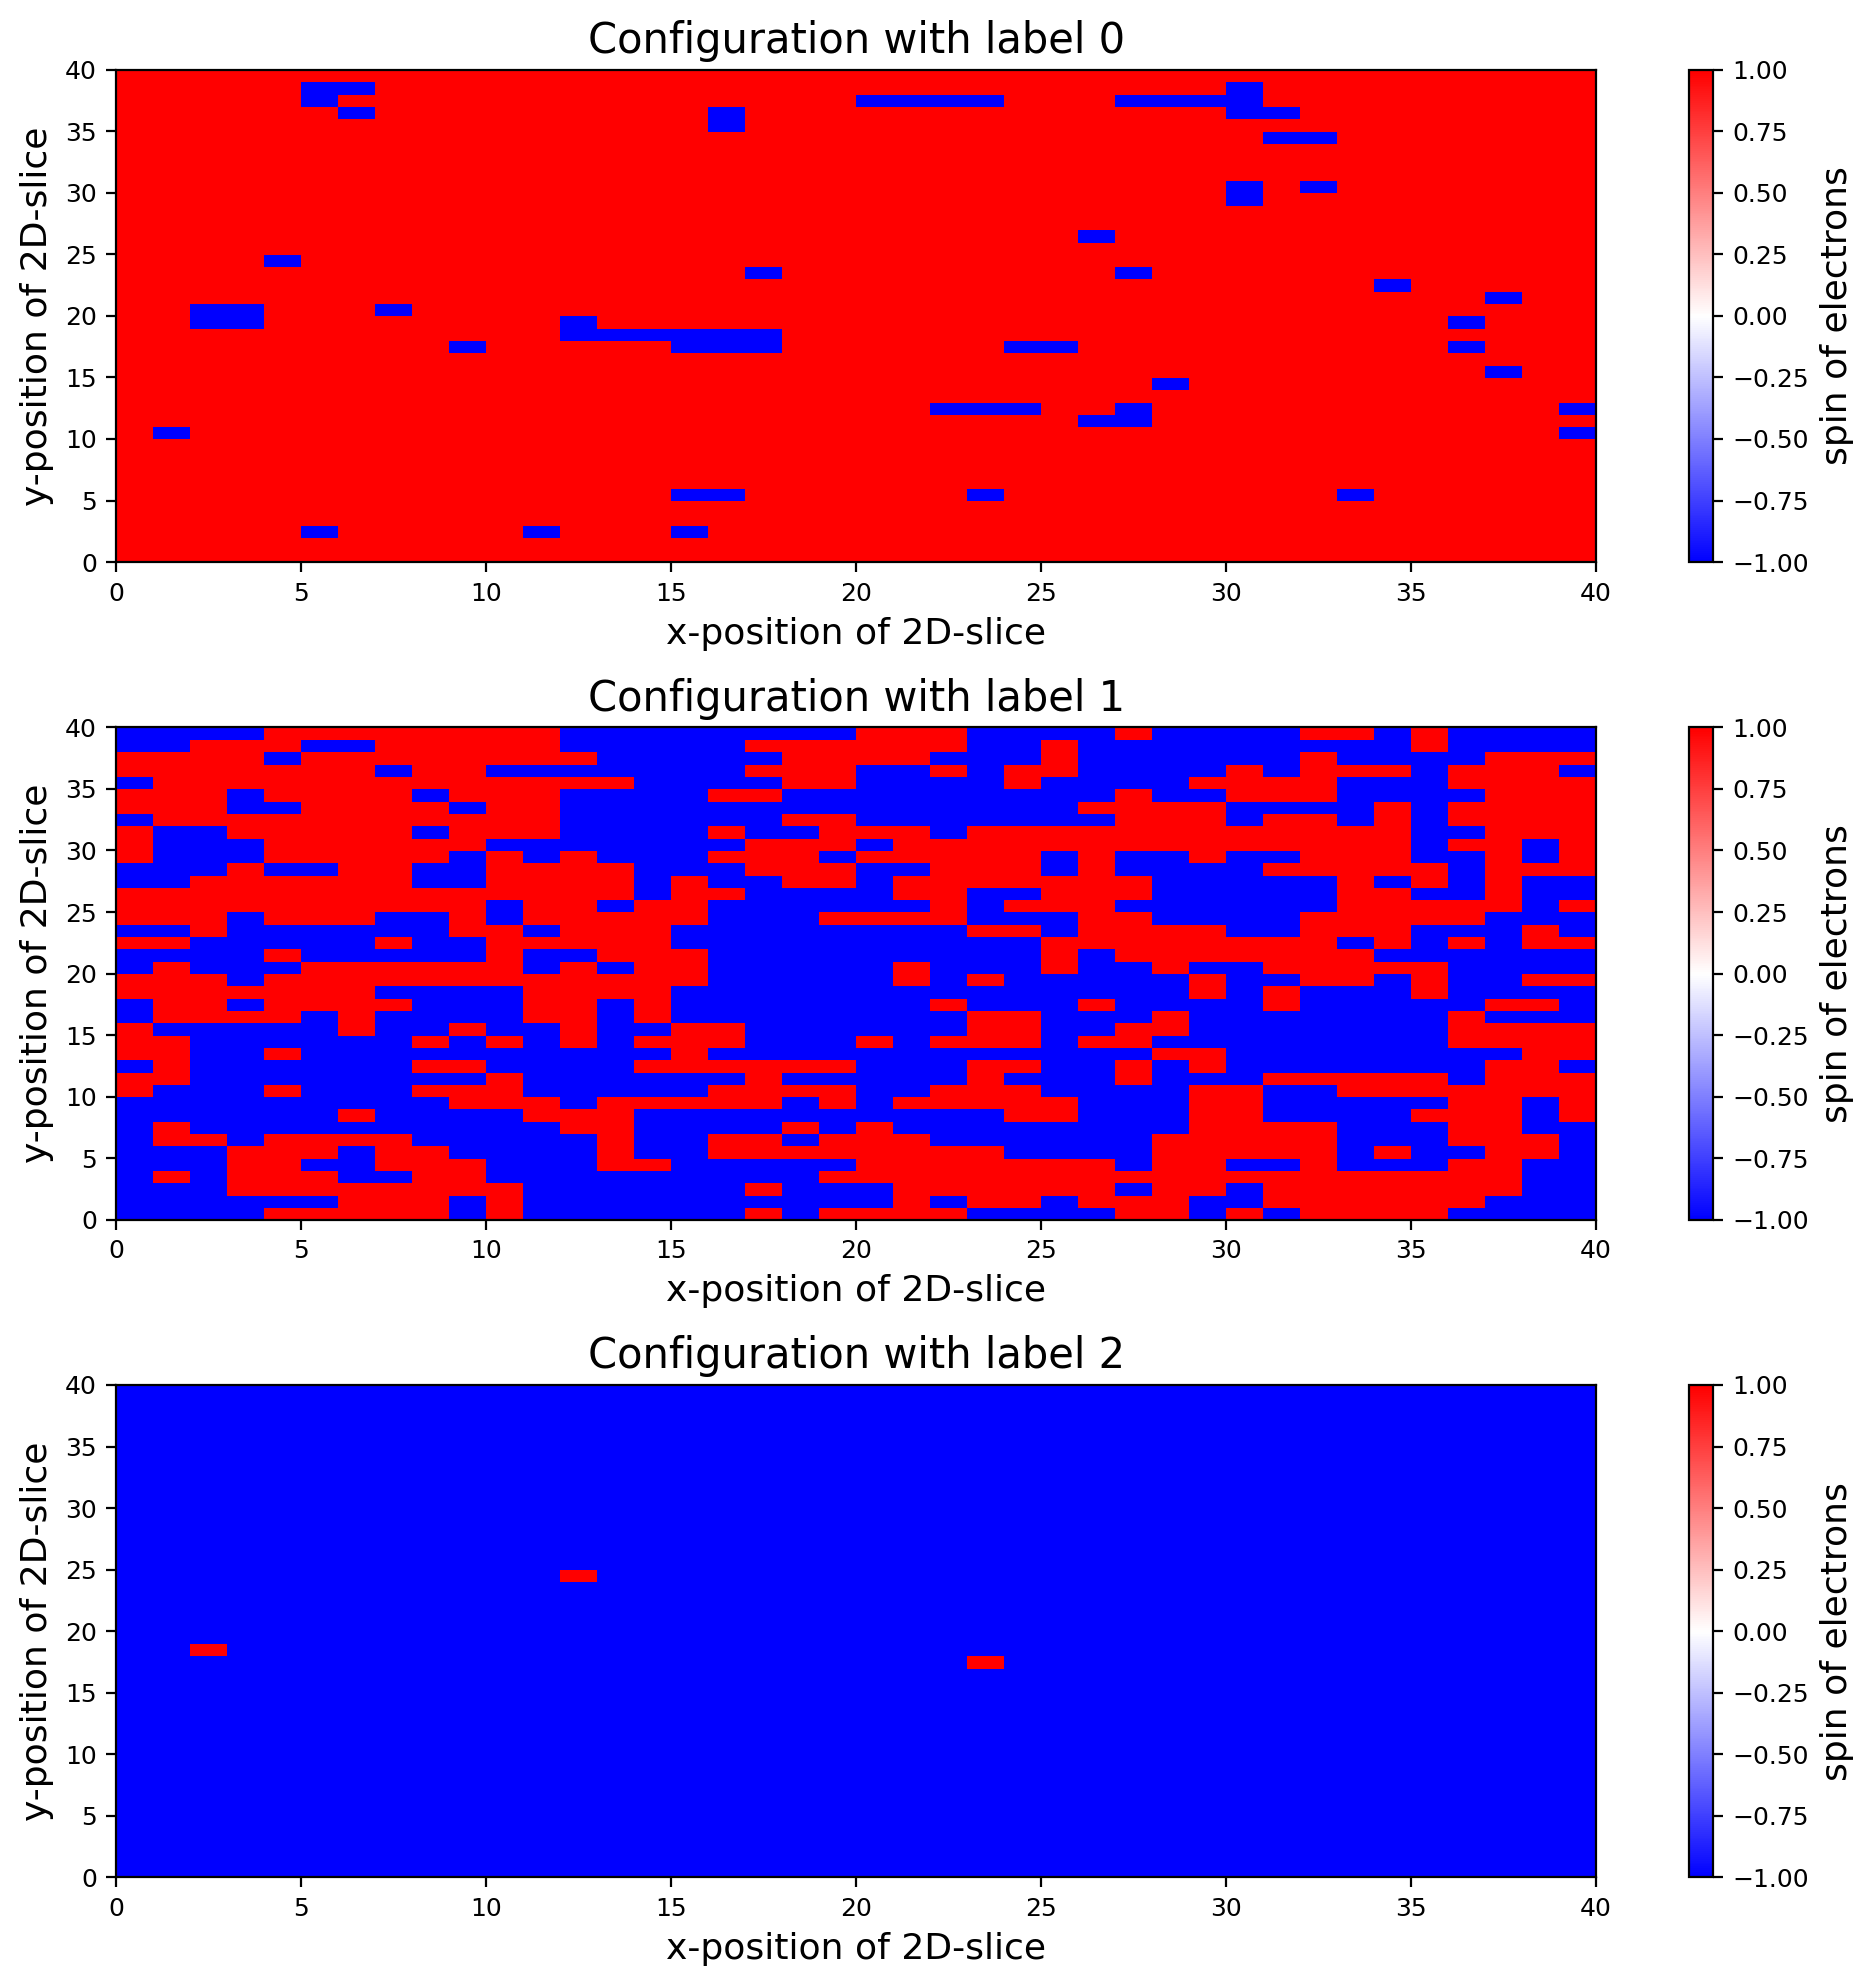

In [71]:
fig, axs=plt.subplots(3, figsize=(10,10), dpi=200)

for i in range(3):
    pi=axs[i].pcolor(spins[random.choice(np.argwhere(labels==i))[0],:,:], cmap='bwr', vmin=-1, vmax=1)
    axs[i].set_title("Configuration with label "+str(i))
    axs[i].set_xlabel("x-position of 2D-slice")
    axs[i].set_ylabel("y-position of 2D-slice")
    plt.colorbar(pi, ax=axs[i], label="spin of electrons")
    

fig.tight_layout()
plt.savefig("data/plots/typical_configurations_of_different_labels.png")

In [57]:
# Since our data show symmetry in terms of magnetization and staggered magnetization, we can further reduce
# the dimensionality be only looking at the absolute values of these features

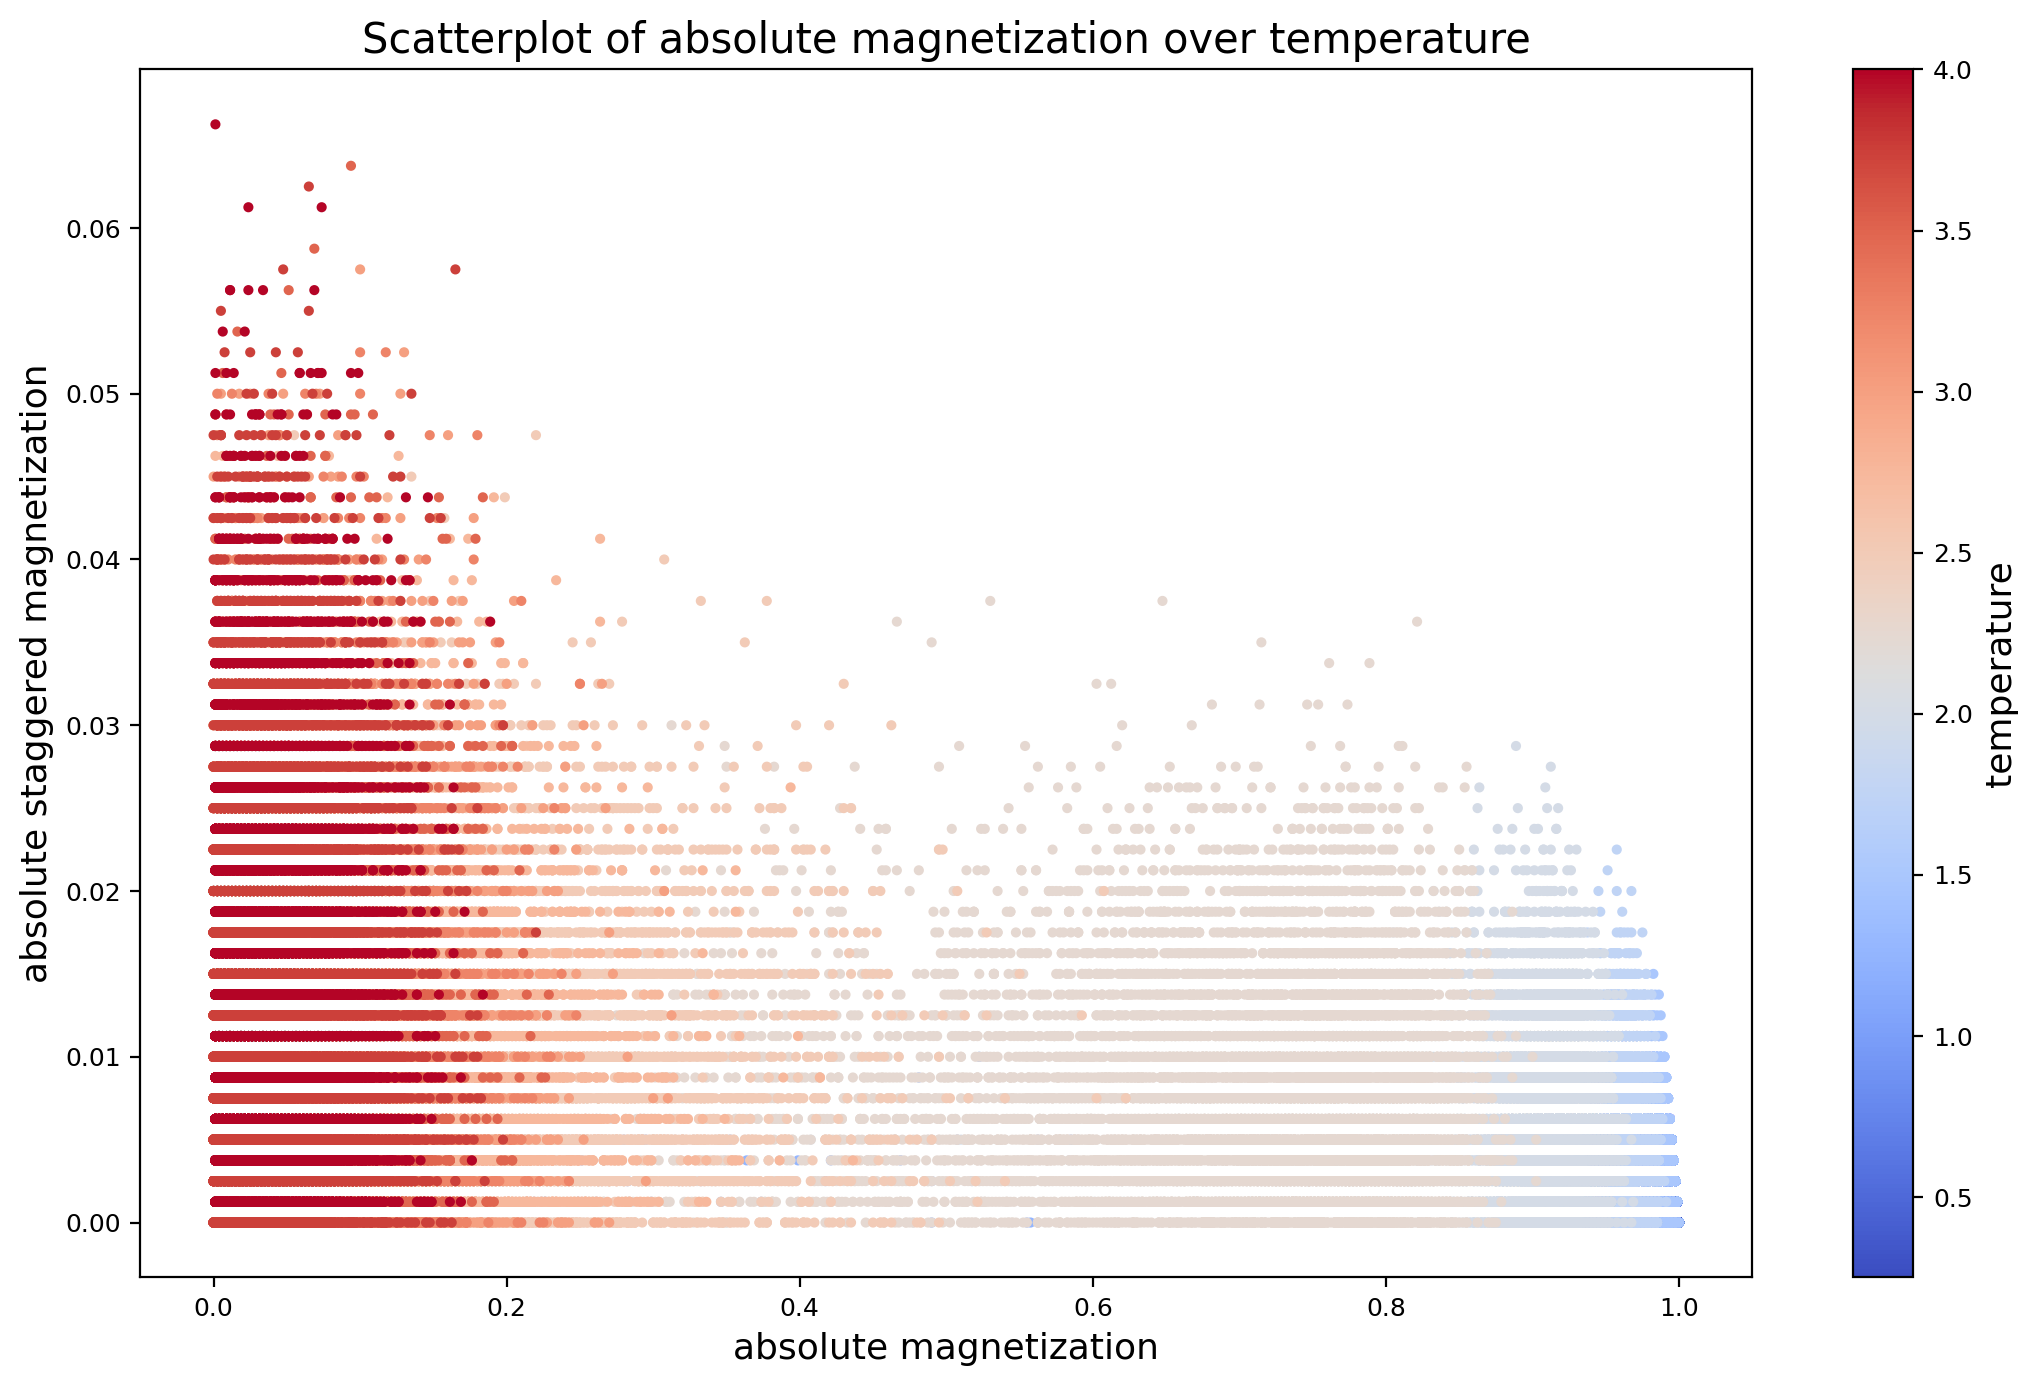

In [61]:
amagn=np.absolute(magn)
asmagn=np.absolute(smagn)

plt.figure(figsize=(13,8), dpi=200)
plt.scatter(amagn, asmagn, c=temp, s=7, cmap='coolwarm')
plt.colorbar(label="temperature")
plt.title("Scatterplot of absolute magnetization over temperature")
plt.xlabel("absolute magnetization")
plt.ylabel("absolute staggered magnetization")
plt.savefig("data/plots/absolute_scatterplot_over_temperature.png")

In [64]:
# again we try clustering into 3 clusters, maybe there exists a transitional phase for our model

c:\users\marcu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


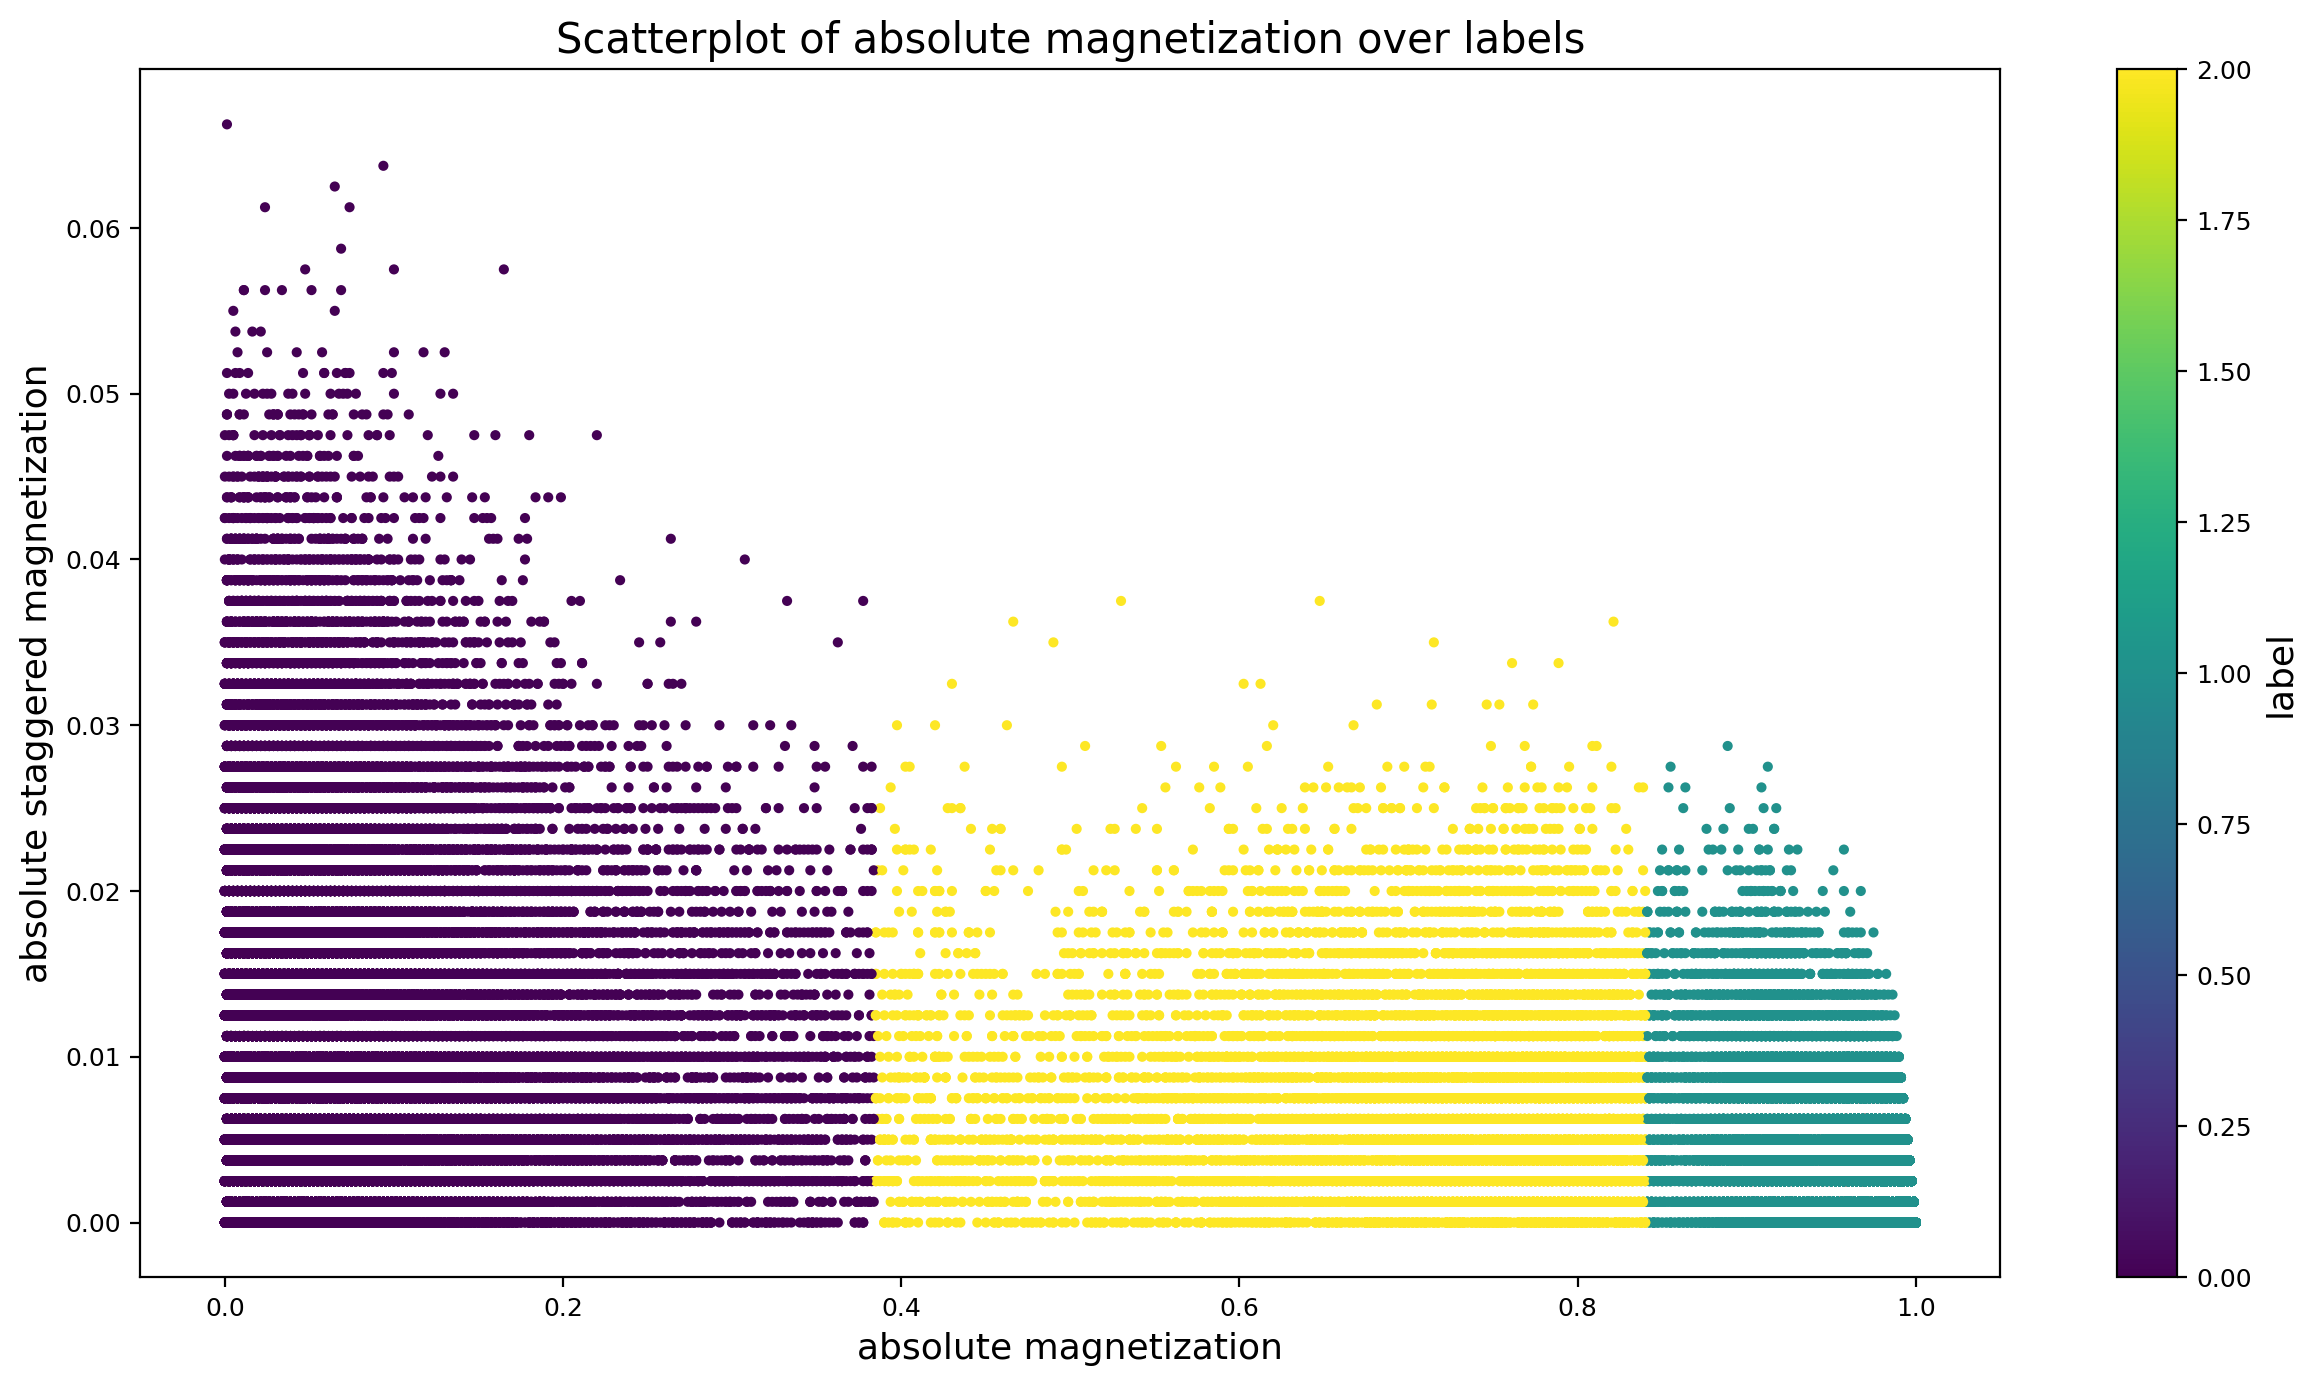

In [66]:
X_hat=np.column_stack((amagn, asmagn))
model_hat=sklearn.cluster.KMeans(n_clusters=3)
model_hat.fit(X_hat)

labels_hat=model_hat.labels_

plt.figure(figsize=(15,8), dpi=200)
plt.scatter(amagn, asmagn, c=labels_hat, s=7)
plt.colorbar(label="label")
plt.title("Scatterplot of absolute magnetization over labels")
plt.xlabel("absolute magnetization")
plt.ylabel("absolute staggered magnetization")
plt.savefig("data/plots/absolute_scatterplot_over_labels.png")

In [67]:
# now we can look at some typical representatives of these three labels

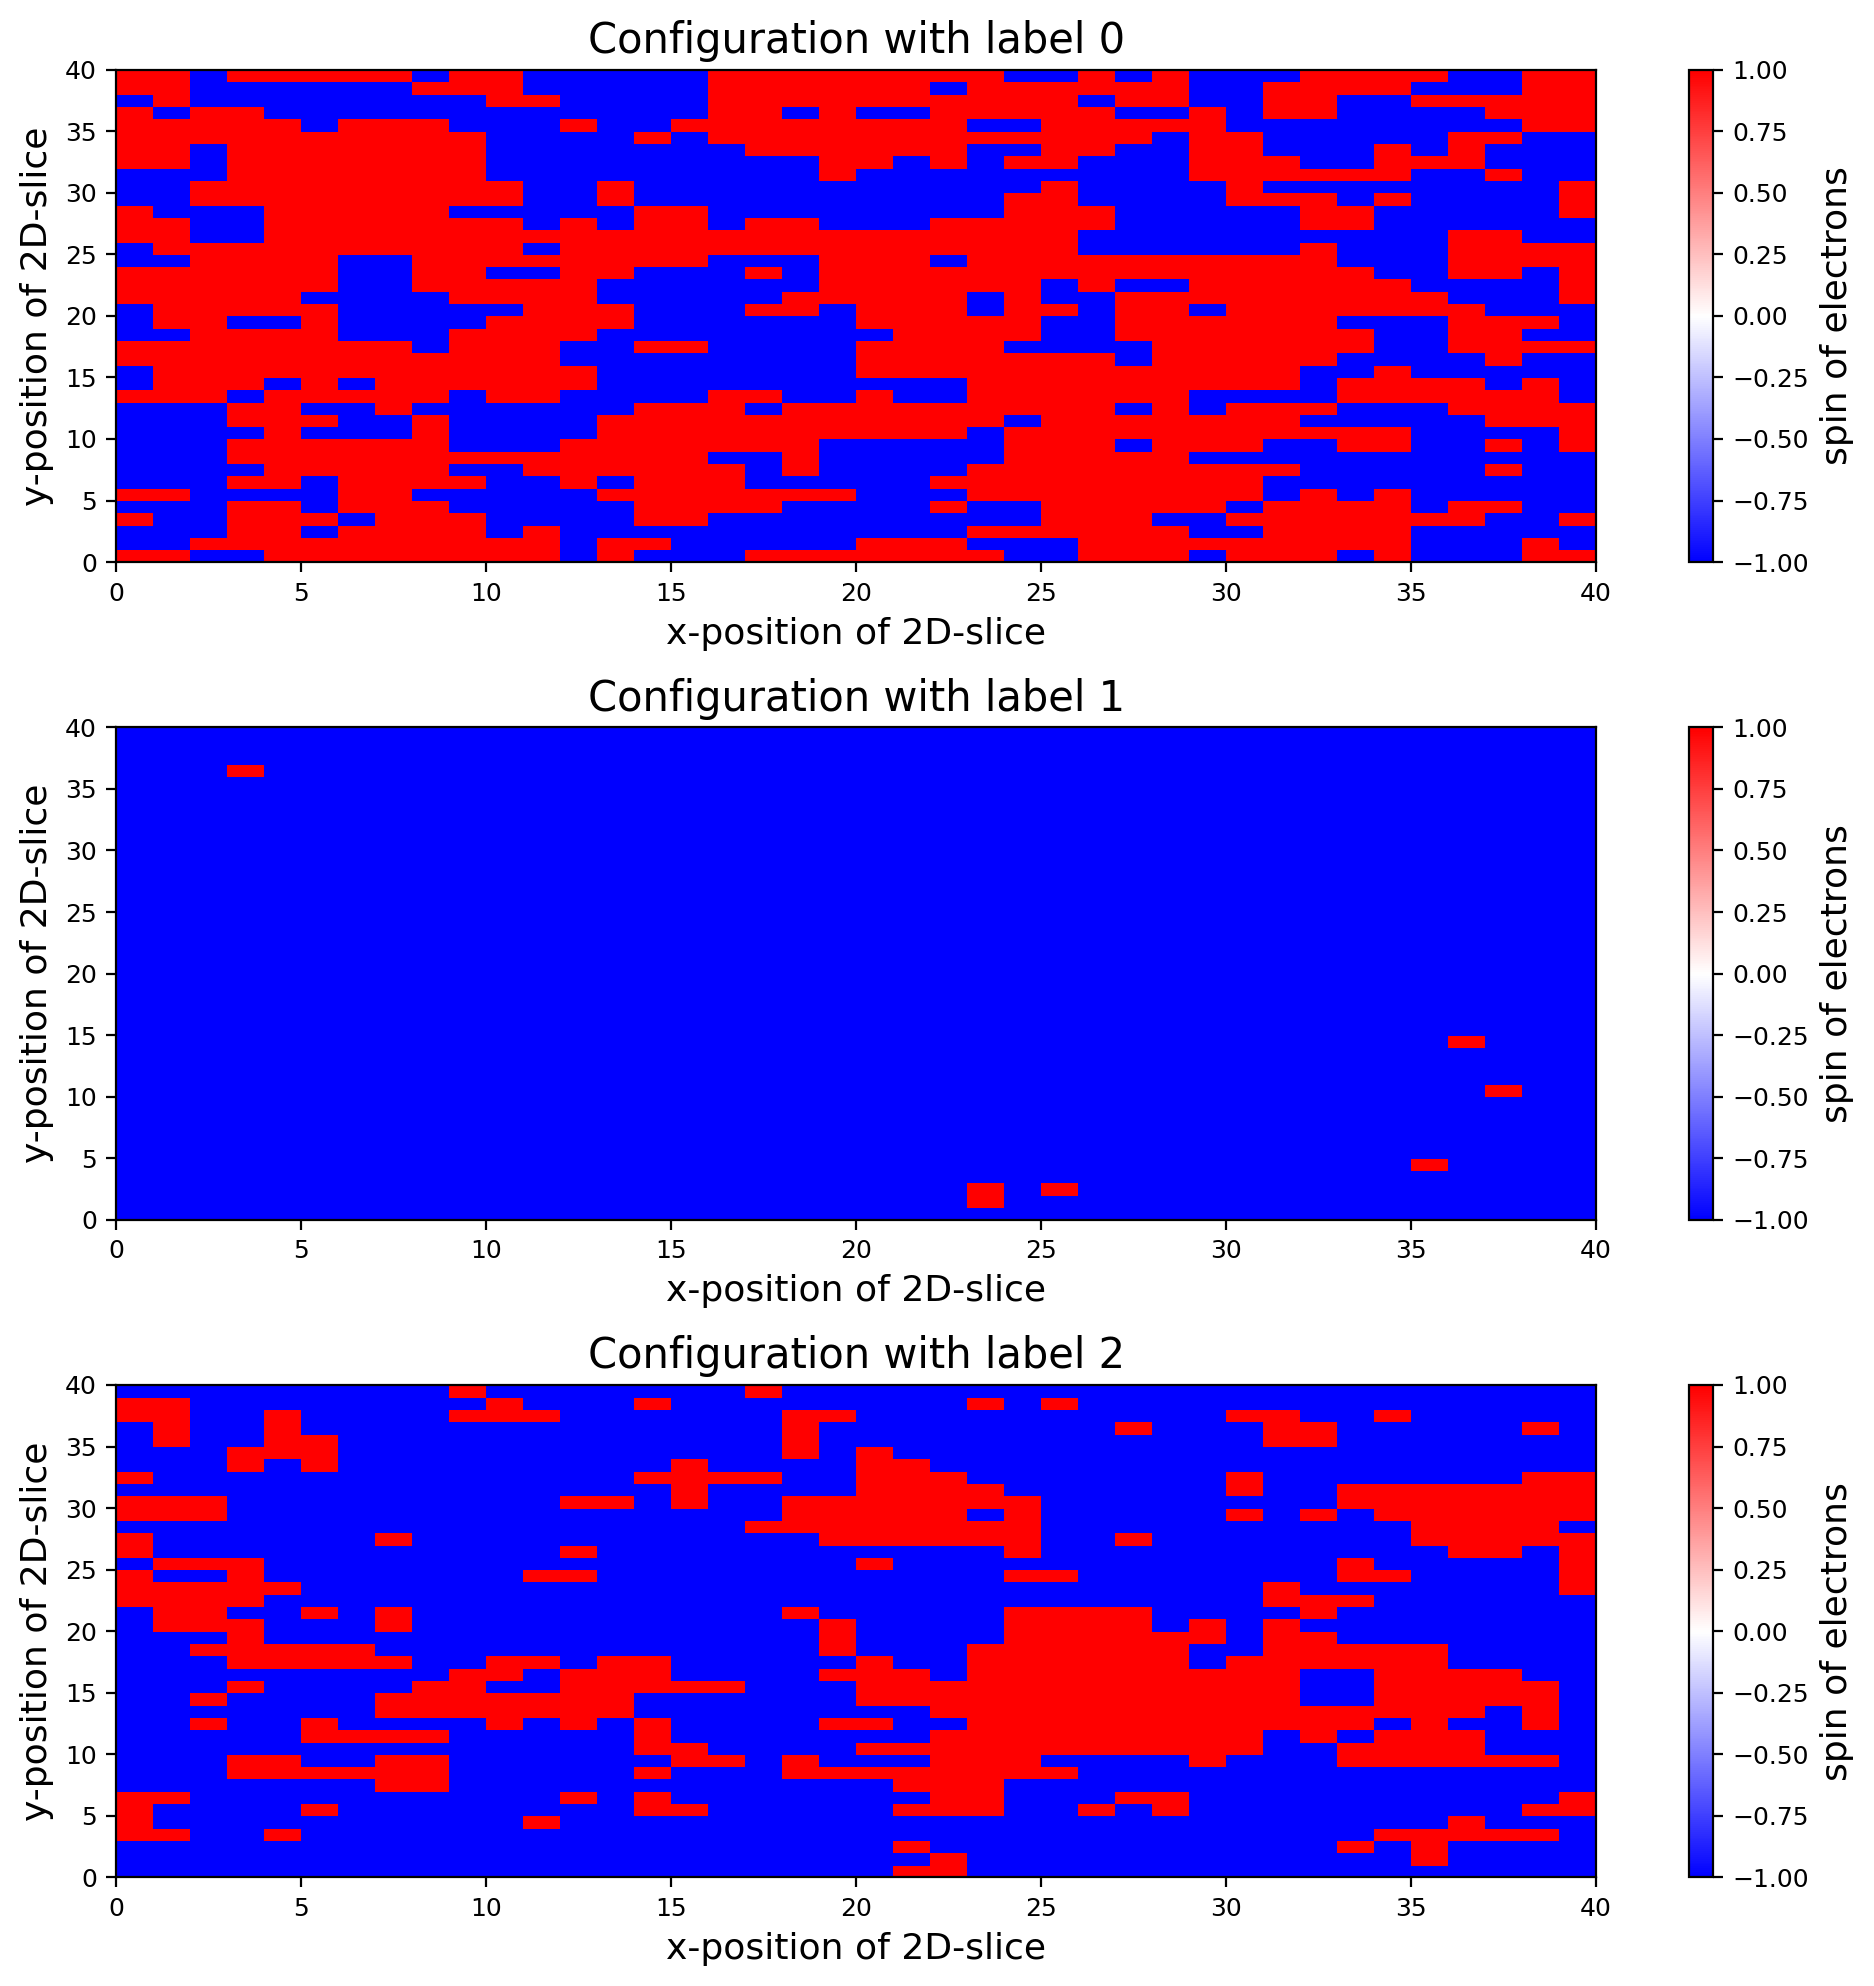

In [72]:
fig, axs=plt.subplots(3, figsize=(10,10), dpi=200)

for i in range(3):
    pi=axs[i].pcolor(spins[random.choice(np.argwhere(labels_hat==i))[0],:,:], cmap='bwr', vmin=-1, vmax=1)
    axs[i].set_title("Configuration with label "+str(i))
    axs[i].set_xlabel("x-position of 2D-slice")
    axs[i].set_ylabel("y-position of 2D-slice")
    plt.colorbar(pi, ax=axs[i], label="spin of electrons")
    

fig.tight_layout()
plt.savefig("data/plots/typical_configurations_of_different_labels_absolute.png")

In [69]:
# so to summarize:
# we have found 5 different magnetic states for our system:
#  - almost all spins have -1 alignment in the low temperature regime,
#  - transitional state where most of the spins have -1 alignment for medium temperatures,
#  - no spin alignment for high temperatures
#  - transitional state for +1 alignment of spins for mid temp.,
#  - almost all spins +1 alignment for low temp.